# Uvod u Seaborn Biblioteku

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236 
**Datum:** 23.07.2025.

---

### 1. **Šta je Seaborn?**

Seaborn je Python biblioteka za statističku vizualizaciju podataka, izgrađena na vrhu matplotlib-a. Omogućava kreiranje profesionalnih grafika sa manje koda.

### **Glavne prednosti:**

- **Jednostavan API** - manje koda za lepe grafikone
- **Statistička podrška** - automatske statističke funkcije
- **Pandas integracija** - radi direktno sa DataFrame-ovima
- **Lepši default izgled** - profesionalni stil

---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Osnovno podešavanje
sns.set_theme()
print("✅ Biblioteke učitane!")
print(f"Seaborn verzija: {sns.__version__}")

✅ Biblioteke učitane!
Seaborn verzija: 0.13.2


### 2. Matplotlib vs Seaborn:

Matplotlib zahteva više koda za lepe grafikone. Seaborn automatski pravi profesionalne grafikone sa manje koda.

In [2]:
# Kreiranje jednostavnih podataka za demonstraciju
np.random.seed(42)

# Podaci o prodaji
data = {
    'Mesec': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] * 2,
    'Prodaja': np.random.randint(50, 200, 12),
    'Proizvod': ['Laptop'] * 6 + ['Telefon'] * 6
}

df = pd.DataFrame(data)
print("Dataset kreiran:")
print(df.head())

Dataset kreiran:
  Mesec  Prodaja Proizvod
0   Jan      152   Laptop
1   Feb      142   Laptop
2   Mar       64   Laptop
3   Apr      156   Laptop
4   May      121   Laptop


### Poređenje matplotlib vs seaborn grafikona

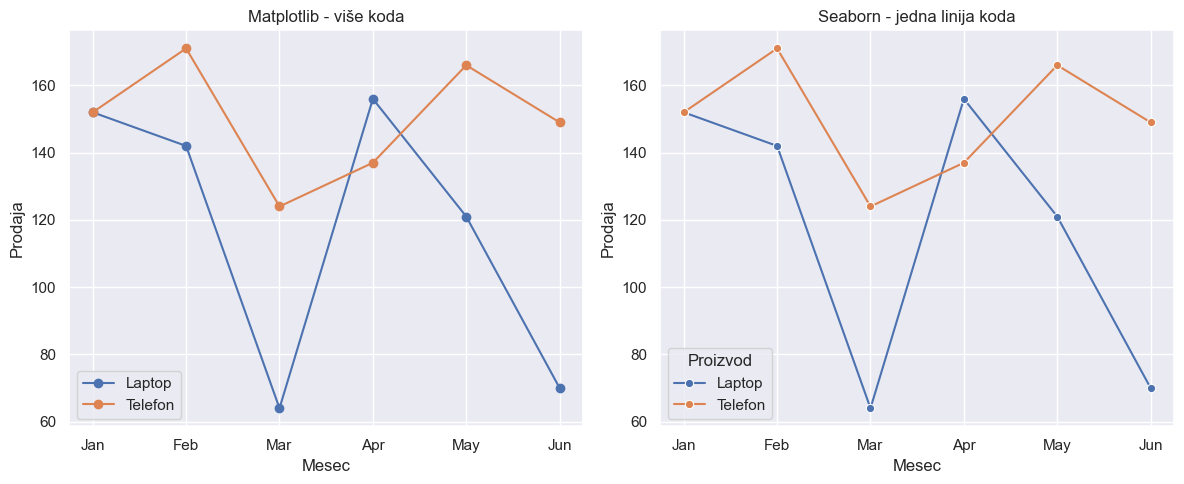

Seaborn prednosti:
✅ Manje koda
✅ Automatska legenda
✅ Lepši default stil
✅ Bolje boje


In [3]:
# Jednostavan prikaz razlike - matplotlib vs seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Matplotlib pristup - više koda
for i, product in enumerate(['Laptop', 'Telefon']):
    product_data = df[df['Proizvod'] == product]
    ax1.plot(product_data['Mesec'], product_data['Prodaja'], 
             marker='o', label=product)

ax1.set_title('Matplotlib - više koda')
ax1.set_xlabel('Mesec')
ax1.set_ylabel('Prodaja')
ax1.legend()
ax1.grid(True)

# 2. Seaborn pristup - jedna linija
sns.lineplot(data=df, x='Mesec', y='Prodaja', hue='Proizvod', 
             marker='o', ax=ax2)
ax2.set_title('Seaborn - jedna linija koda')

plt.tight_layout()
plt.show()

print("Seaborn prednosti:")
print("✅ Manje koda")
print("✅ Automatska legenda") 
print("✅ Lepši default stil")
print("✅ Bolje boje")

### Prednosti Seaborn-a u ovom primeru:

1. **Manje koda**: Jedna linija umesto petlje
2. **Automatska legenda** i boje
3. **Lepši default stil**
4. **Prirodna podrška za pandas DataFrame**

---

## 3. Seaborn stilovi i teme

Seaborn omogućava lako menjanje izgleda grafikona kroz različite stilove.

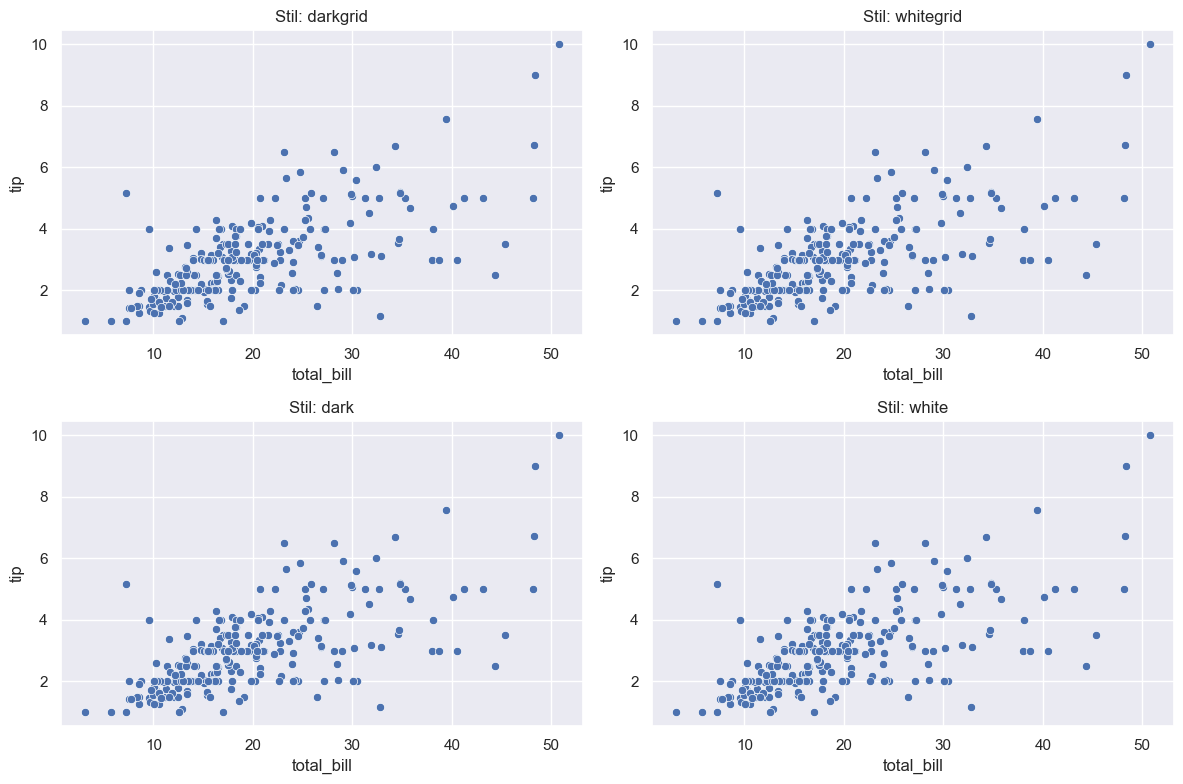

Dostupni stilovi:
• darkgrid - tamna pozadina sa mrežom
• whitegrid - bela pozadina sa mrežom
• dark - tamna pozadina bez mreže
• white - bela pozadina bez mreže


In [4]:
# Demonstracija različitih stilova
tips = sns.load_dataset('tips')

# Kreiranje 4 različita stila
styles = ['darkgrid', 'whitegrid', 'dark', 'white']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, style in enumerate(styles):
    with sns.axes_style(style):
        sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[i])
        axes[i].set_title(f'Stil: {style}')

plt.tight_layout()
plt.show()

print("Dostupni stilovi:")
print("• darkgrid - tamna pozadina sa mrežom")  
print("• whitegrid - bela pozadina sa mrežom")
print("• dark - tamna pozadina bez mreže")
print("• white - bela pozadina bez mreže")

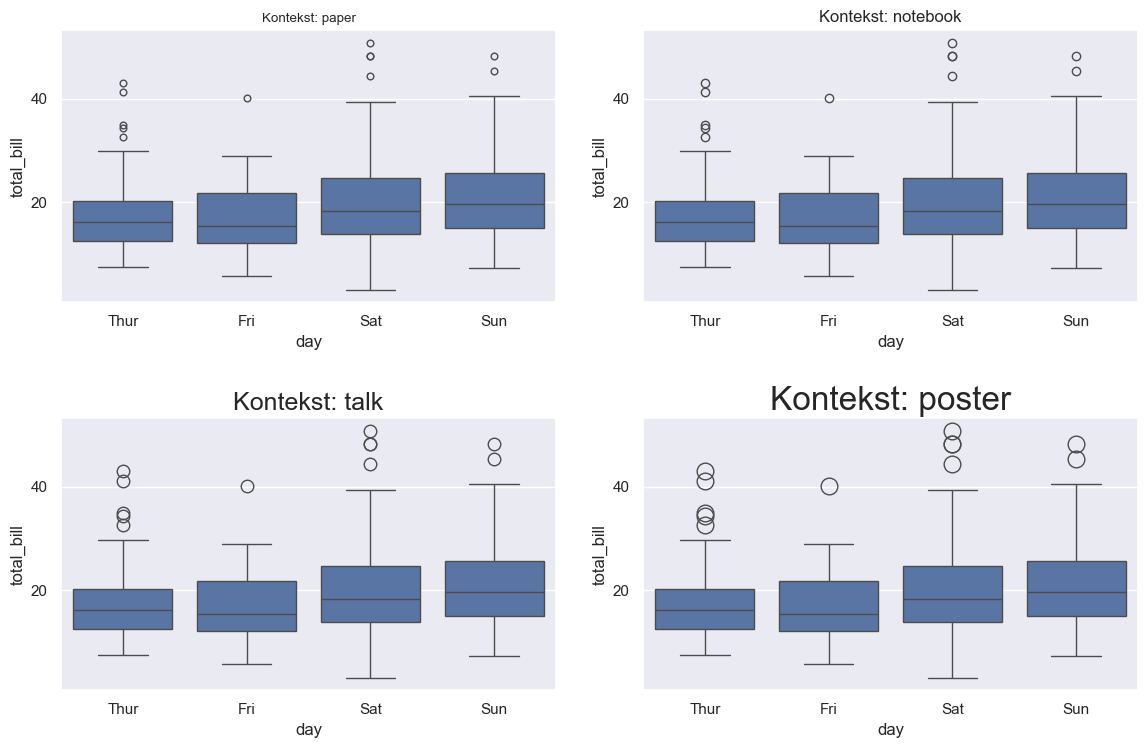

Konteksti u Seaborn-u:
• paper - za manje grafikone u člancima
• notebook - standardni za Jupyter
• talk - za prezentacije
• poster - za poster prezentacije


In [5]:
# Različiti konteksti (veličine elemenata)
contexts = ['paper', 'notebook', 'talk', 'poster']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, context in enumerate(contexts):
    sns.set_context(context)
    sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[i])
    axes[i].set_title(f'Kontekst: {context}')

plt.tight_layout()
plt.show()

print("Konteksti u Seaborn-u:")
print("• paper - za manje grafikone u člancima")
print("• notebook - standardni za Jupyter")
print("• talk - za prezentacije")  
print("• poster - za poster prezentacije")

## 4. Zaključak

U ovom notebook-u smo prošli kroz osnovne koncepte Seaborn biblioteke:

### Što smo naučili:
- **Definiciju** Seaborn biblioteke
- **Prednosti** u odnosu na matplotlib
- **Praktičan primer** poređenja
- **Stilove i kontekste** za različite namene

### Ključne prednosti Seaborn-a:
1. **Jednostavnost** - manje koda za lepše grafikone
2. **Automatika** - legendе, boje, stil
3. **Pandas integracija** - radi direktno sa DataFrame
4. **Profesionalan izgled** - publication-ready grafikoni

### Sledeći koraci:
U narednom notebook-u ćemo detaljno istražiti plotting funkcije i kako ih koristiti.

---

**Napomena**: Ovaj notebook služi kao uvod u seaborn. Za dublje razumevanje, proučite naredne notebook-ove.